# Homework Assignment Number One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [5]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [6]:
names = killings.columns.tolist()
names[names.index('lawenforcementagency')] = 'agency'
names[names.index('raceethnicity')] = 'race'
killings.columns = names
killings.head()

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [29]:
killings.gender.value_counts(normalize=True)["Male"]*100

95.289079229122052

### 2. Show the count of missing values in each column

In [7]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [8]:
killings.streetaddress.fillna('unknown', inplace=True)
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 4. How many killings were there in March and April?

In [16]:
killings[(killings.month == "March") | (killings.month == "April")].shape[0]

210

### 5. How many male and how many female victims are there?

In [12]:
killings.gender.apply(lambda x:"male" in x or "female" in x).sum()

22

In [39]:
killings.gender.value_counts(normalize=False)


Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [41]:

killings.armed.value_counts(normalize=False)["No"]

102

### 7. What percentage of all killings were unarmed?

In [43]:
killings.armed.value_counts(normalize=True)["No"]*100

Firearm               49.250535
No                    21.841542
Knife                 14.561028
Other                  5.567452
Vehicle                3.854390
Non-lethal firearm     2.997859
Unknown                1.498929
Disputed               0.428266
Name: armed, dtype: float64

### 8. What are the 5 states with the most killings?

In [45]:
killings.state.value_counts(normalize=False).sort_values(ascending=False).head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [46]:
killings.race.value_counts(normalize=False)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

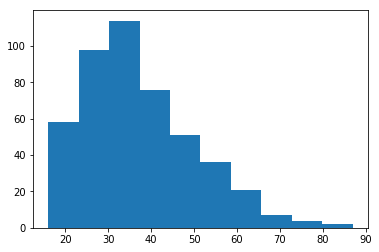

In [54]:
plt.hist(killings.age)
plt.show()

### 11. Show histogram of ages for each race

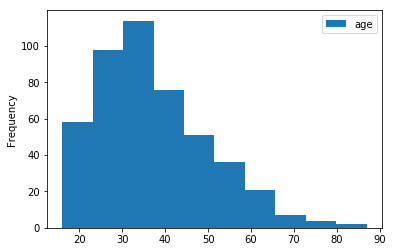

In [53]:
killings.plot(x="race", y = "age", kind="hist")
plt.show()

### 12. What is the average age of death by race?

In [66]:
 cols = ["age"]
killings.groupby("race")[cols].mean()

,age
race,
Asian/Pacific Islander,40.800000
Black,34.044444
Hispanic/Latino,31.716418
Native American,27.750000
Unknown,43.533333
White,40.466102


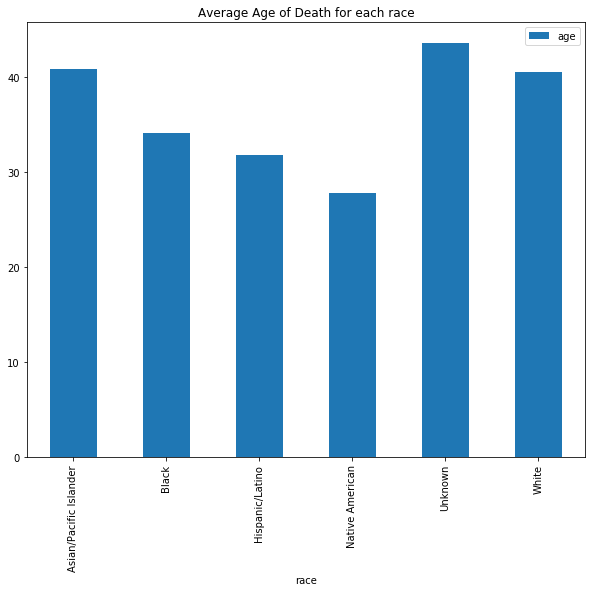

In [65]:
# Plot of average age of death by race?
cols = ["age"]
killings.groupby("race")[cols].mean().plot(kind="bar", figsize=(10,8), 
                                           title = "Average Age of Death for each race")
plt.show()

### 13. Show a bar chart with counts of deaths every month

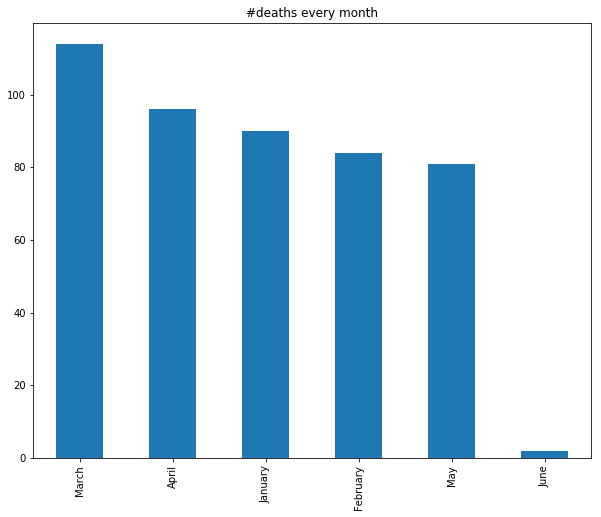

In [64]:
killings.month.value_counts(normalize=False).plot(kind="bar", figsize=(10,8), 
                                           title = "#deaths every month")
plt.show()

## Section 2: College Majors

In [74]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [75]:
majors.drop("Employed_full_time_year_round", axis = 1, inplace=True)
majors.drop("Major_code", axis = 1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [76]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [94]:
majors.groupby("Major")["P75th"].sum().sort_values(ascending=False).head(10)

Major
PETROLEUM ENGINEERING                                  210000.0
MATHEMATICS AND COMPUTER SCIENCE                       136000.0
NUCLEAR ENGINEERING                                    128000.0
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    125000.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING              125000.0
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                 125000.0
MINING AND MINERAL ENGINEERING                         124000.0
METALLURGICAL ENGINEERING                              123000.0
CHEMICAL ENGINEERING                                   120000.0
ELECTRICAL ENGINEERING                                 116000.0
Name: P75th, dtype: float64

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


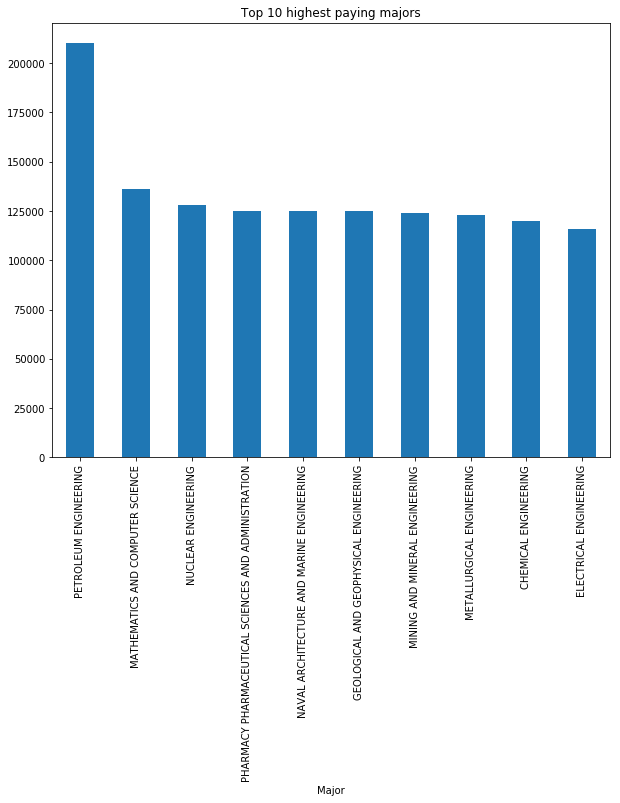

In [95]:
majors.groupby("Major")["P75th"].sum().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,8), 
                                           title = "Top 10 highest paying majors")
plt.show()

### 5. What is the average median salary for each major category?

In [84]:
majors.groupby("Major")["Median"].mean().sort_values(ascending=False)

Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
COMPUTER ENGINEERING                                    80000
ASTRONOMY AND ASTROPHYSICS                              80000
MECHANICAL ENGINEERING                                  80000
AEROSPACE ENGINEERING                                   80000
ARCHITECTURAL ENGINEERING                               78000
MATERIALS ENGINEERING AND MATERIALS SCIENCE             78000
CO

### 6. Visualize only the top 5 paying major categories

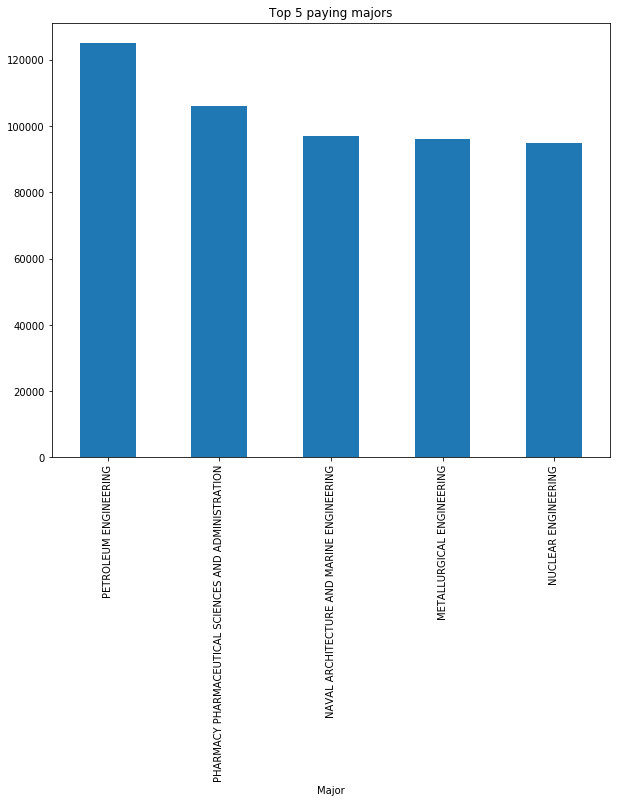

In [90]:
majors.groupby("Major")["Median"].mean().sort_values(ascending=False).head(5).plot(kind="bar", figsize=(10,8), 
                                           title = "Top 5 paying majors")
plt.show()

### 7. Plot a histogram of the distribution of median salaries

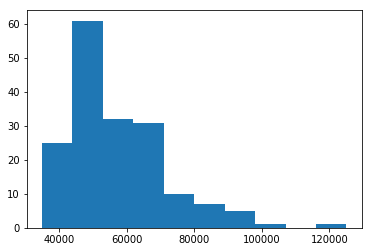

In [91]:
plt.hist(majors.Median)
plt.show()

### 8. Plot a histogram of the distribution of median salaries by major category

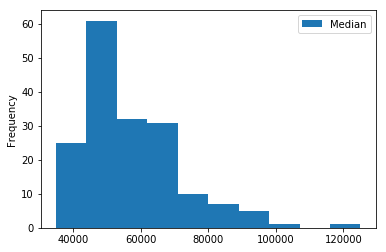

In [92]:
majors.plot(x="Major", y = "Median", kind="hist")
plt.show()

### 9. What are the top 10 most UNemployed majors?

In [93]:
majors.groupby("Major")["Unemployed"].sum().sort_values(ascending=False).head(10)

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [96]:
majors.groupby("Major_category")["Unemployed"].mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [2]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [3]:
fifa.columns = fifa.columns.str.lower()
fifa.set_index("name", inplace=True)
fifa.drop("national_position", axis = 1, inplace=True)
fifa.drop("national_kit", axis = 1, inplace=True)
fifa.drop("club_kit", axis = 1, inplace=True)
fifa.drop("club_joining", axis = 1, inplace=True)
fifa.drop("contract_expiry", axis = 1, inplace=True)
fifa[fifa.rating >70]
fifa.drop(["gk_positioning", "gk_diving","gk_kicking","gk_handling","gk_reflexes"], axis =1 , inplace=True)
fifa["height"] = fifa.height.str.replace("cm", "")
fifa["height"] = fifa.height.astype(float)
fifa["weight"] = fifa.weight.str.replace("kg", "")
fifa["weight"] = fifa.weight.astype(float)
fifa.dropna(inplace=True)
fifa.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11


### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [14]:
#col = ["speed", "marking", "finishing"]

#fifa.groupby("name")[col].mean().sort_values(ascending=False).head(10)
fifa.sort_values(by="speed").head().index

Index([u'Horacio Ramírez', u'Miłosz Mleczko', u'Chris Day',
       u'Kazushige Kirihata', u'Daniel Andersson'],
      dtype='object', name=u'name')

In [15]:
fifa.sort_values(by="marking").head().index

Index([u'Diego Figueroa', u'Callum Stanton', u'Peter Vindahl Jensen',
       u'Dani Hernández', u'Yerko Urra'],
      dtype='object', name=u'name')

In [20]:
fifa.sort_values(by="finishing").head().index

Index([u'Louis Bostyn', u'Alexandre Bouchard', u'Tarjei Aase Omenås',
       u'Theo Zwarthoed', u'Dorian Grange'],
      dtype='object', name=u'name')

In [19]:
fifa.groupby("name")["speed"].mean().sort_values(ascending=False).head()

name
Anibal Chalá                 96.0
Pierre-Emerick Aubameyang    96.0
Jonathan Biabiany            96.0
Williams                     95.0
Gareth Bale                  95.0
Name: speed, dtype: float64

In [21]:
fifa.groupby("name")["marking"].mean().sort_values(ascending=False).head()

name
Giorgio Chiellini    92.0
Jérôme Boateng       90.0
Andrea Barzagli      90.0
Thiago Silva         90.0
Miranda              89.0
Name: marking, dtype: float64

In [22]:
fifa.groupby("name")["finishing"].mean().sort_values(ascending=False).head()

name
Lionel Messi          95.0
Luis Suárez           94.0
Cristiano Ronaldo     93.0
Gonzalo Higuaín       92.0
Robert Lewandowski    91.0
Name: finishing, dtype: float64

### 3. Who is the tallest French lefted foot player?

In [4]:
f3 = fifa.sort_values(by = "height", ascending =False)

f4 = f3[(f3.nationality == "France") & (f3.preffered_foot == "Left")].head(1);
f4.index

Index([u'Lucas Mocio'], dtype='object', name=u'name')

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [24]:
fifa.corr()

,rating,height,weight,age,weak_foot,skill_moves,ball_control,dribbling,marking,sliding_tackle,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
rating,1.000000,0.046937,0.139703,0.458098,0.226263,0.251926,0.463211,0.368565,0.236843,0.215385,...,0.283309,0.289840,0.343265,0.441773,0.328576,0.419517,0.420796,0.399575,0.339898,0.386494
height,0.046937,1.000000,0.758208,0.076727,-0.180431,-0.431177,-0.402596,-0.483545,-0.042485,-0.069602,...,-0.611198,-0.063048,0.005367,-0.273413,-0.347154,-0.364182,-0.423115,-0.380217,-0.321246,-0.333576
weight,0.139703,0.758208,1.000000,0.223432,-0.135402,-0.375163,-0.338460,-0.412959,-0.030512,-0.062312,...,-0.535404,0.005842,0.019235,-0.188739,-0.281775,-0.274446,-0.343380,-0.293956,-0.246189,-0.258932
age,0.458098,0.076727,0.223432,1.000000,0.086137,-0.016088,0.082875,0.004575,0.131425,0.096679,...,-0.019459,0.168694,0.137785,0.151174,0.064487,0.149635,0.139101,0.195338,0.131469,0.133950
weak_foot,0.226263,-0.180431,-0.135402,0.086137,1.000000,0.336905,0.367420,0.363398,0.026950,0.025865,...,0.306049,0.064655,0.190847,0.334897,0.361983,0.365637,0.359044,0.345745,0.340757,0.366610
skill_moves,0.251926,-0.431177,-0.375163,-0.016088,0.336905,1.000000,0.727123,0.762623,0.032811,0.043037,...,0.637400,0.035166,0.391626,0.640183,0.715228,0.680434,0.689265,0.634867,0.662108,0.701017
ball_control,0.463211,-0.402596,-0.338460,0.082875,0.367420,0.727123,1.000000,0.931117,0.355429,0.357025,...,0.695569,0.172802,0.658111,0.829902,0.781218,0.831846,0.832009,0.763315,0.767803,0.789287
dribbling,0.368565,-0.483545,-0.412959,0.004575,0.363398,0.762623,0.931117,1.000000,0.228543,0.243277,...,0.754705,0.117374,0.548257,0.795016,0.817034,0.836080,0.840061,0.750014,0.765259,0.804633
marking,0.236843,-0.042485,-0.030512,0.131425,0.026950,0.032811,0.355429,0.228543,1.000000,0.959955,...,0.085645,0.258669,0.546994,0.219159,-0.096066,0.116621,0.206493,0.233461,0.062951,0.013556
sliding_tackle,0.215385,-0.069602,-0.062312,0.096679,0.025865,0.043037,0.357025,0.243277,0.959955,1.000000,...,0.103459,0.254936,0.523946,0.217468,-0.098796,0.117163,0.216875,0.241188,0.059355,0.015133


### 5. Make a heatmap of the dataset's correlation table

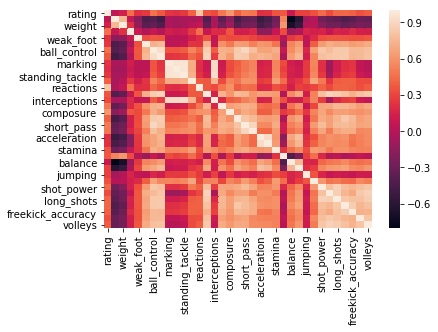

In [23]:
sns.heatmap(fifa.corr());

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [31]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [32]:
#fifa2 =fifa[fifa.club == clubs_list]
#fifa2.head()drinks.info()
fifa2 = fifa[fifa.club.isin(clubs_list)]
fifa2.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

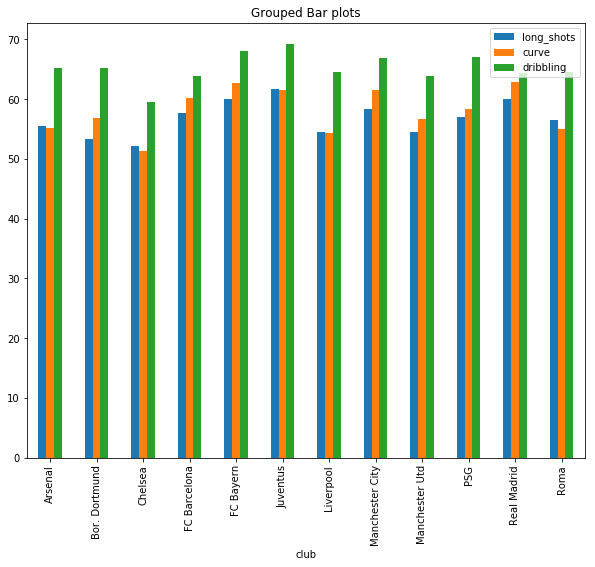

In [33]:
cols = ["long_shots", "curve", "dribbling"]
fifa2.groupby("club")[cols].mean().plot(kind="bar", figsize=(10,8), 
                                           title = "Grouped Bar plots")
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

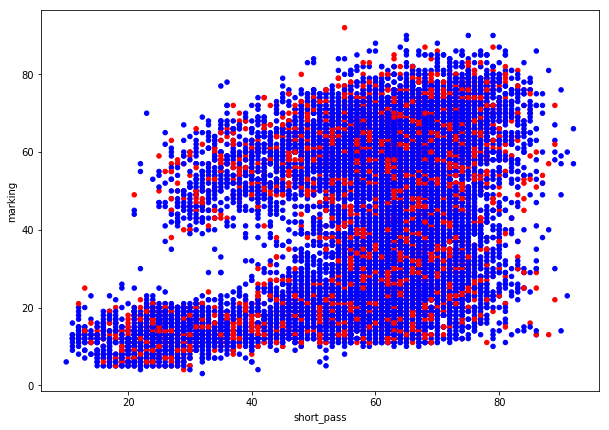

In [41]:
color_dict = {"Left":"r", "Right":"b"}
colors = fifa2.preffered_foot.map(color_dict)

fifa.plot(x="short_pass", y = "marking", kind="scatter", c=colors, figsize=(10, 7))
plt.show()

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

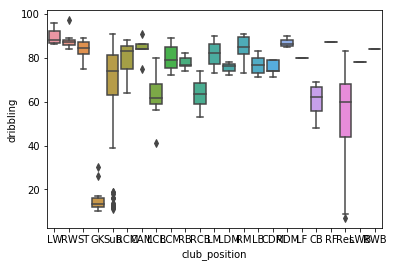

In [45]:
#Dribbling boxplot
sns.boxplot(x="club_position", y = "dribbling", data = fifa2);

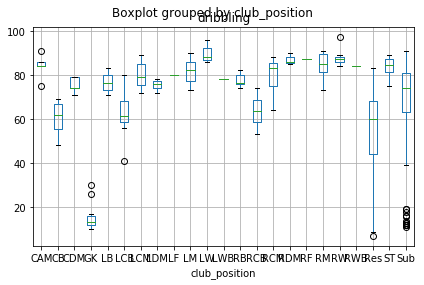

In [46]:

plt.figure(figsize=(24, 24))
fifa2.boxplot(column="dribbling", by="club_position")
plt.tight_layout()
plt.show()

Which position is better at dribbling? ST or RCM? Why?

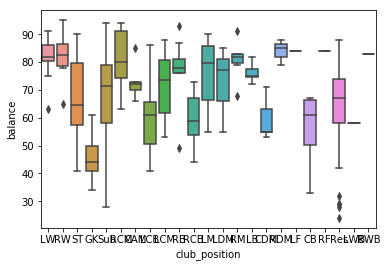

In [39]:
#Balance boxplot
sns.boxplot(x="club_position", y = "balance", data = fifa2);

Which position is better at balance? LM or LDM? Why?

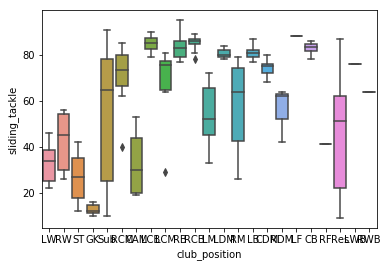

In [40]:
#sliding_tackle boxplot
sns.boxplot(x="club_position", y = "sliding_tackle", data = fifa2);

What is the IQR for positions ST, RB, and RM?